# SIGNAL PROCESSING TP2 - M2 AI
## To Do: IIR Delay effect

- Benedictus Kent Rachmat
- Jacobo Ruiz Ocampo

---

## IMPORT

In [1]:
import librosa
import numpy as np
import librosa.display
import IPython.display as ipd
from scipy.signal import freqz
import matplotlib.pyplot as plt

## PLAY THE AUDIO

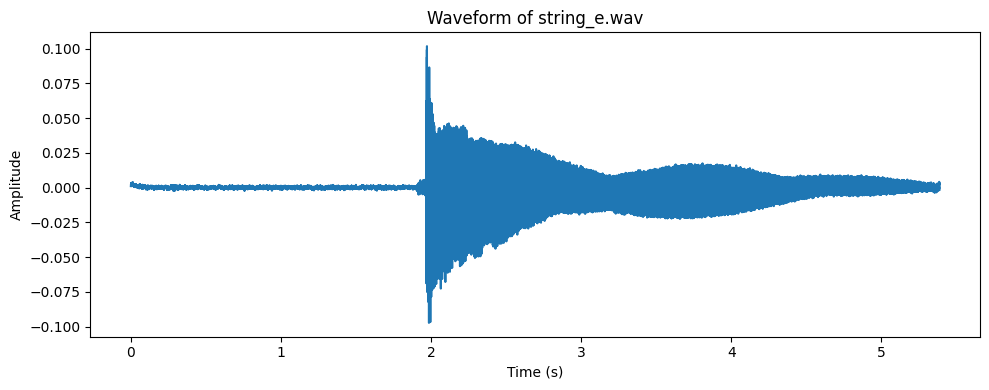

In [2]:
filename = "string_e.wav"
y, sr = librosa.load(filename)

plt.figure(figsize=(10, 4))
# librosa.display.waveshow(y, sr=sr)
plt.plot(np.linspace(0, len(y) / sr, num=len(y)), y)
plt.title(f'Waveform of {filename}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

ipd.Audio(y, rate=sr)

## Determine the impulse response of the filter for D=1


Given the IIR filter equation:
$$
s[t] = a \cdot e[t] + \beta \cdot s[t - D]
$$

with parameters $ a = 0.5 $, $ \beta = 0.5 $, and $ D = 1 $. With:

$$e[t] = 
\begin{cases} 
1 & \text{if } t = 0 \\
0 & \text{otherwise}
\end{cases}$$


At $ t = 0 $, the impulse $ e[0] $ is 1, and $ s[-1] $ is 0. Thus, the response $ s[0] $ is purely due to the scaling factor $ a $, making it $ s[0] = 0.5 $. From here we can determine the subsequent responses for $t>0$ such as: 

- $t=1, s[1] = 0.5 * s[0] = 0.5 *0.5 = 0.25$
- $t=2, s[2] = 0.5 * s[1] = 0.5 *0.25 = 0.125$
- and so on.. 

However, due to the recursive nature of the filter and the fact that $ \beta = 0.5 $ (halving the value at each step), the decay is exponential. Since the decay is very rapid, the values after a few steps are so small that they appear to be nearly aligned with the x-axis.

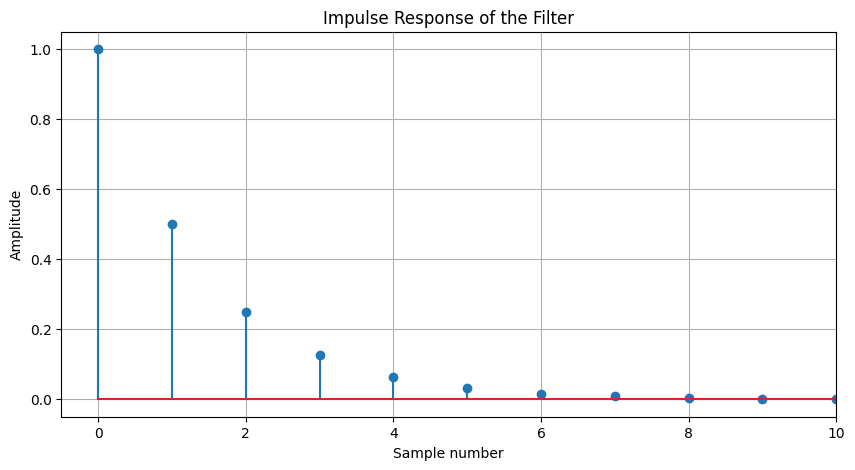

In [3]:
s_iir = np.zeros_like(y)
impulse = np.zeros_like(y)
impulse[0] = 1

a = 1
D = 1
beta = 0.5

# Apply the IIR delay effect 
for t in range(len(impulse)):
    s_iir[t] = a * impulse[t] + beta * s_iir[t - D]

# Plotting
plt.figure(figsize=(10, 5))
plt.stem(s_iir)

plt.title('Impulse Response of the Filter')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.xlim(-0.5,10)
plt.grid(True)
plt.show()


In [4]:
s_iir[:10]

array([1.        , 0.5       , 0.25      , 0.125     , 0.0625    ,
       0.03125   , 0.015625  , 0.0078125 , 0.00390625, 0.00195312],
      dtype=float32)

## Provide the Frequency response of the filter??

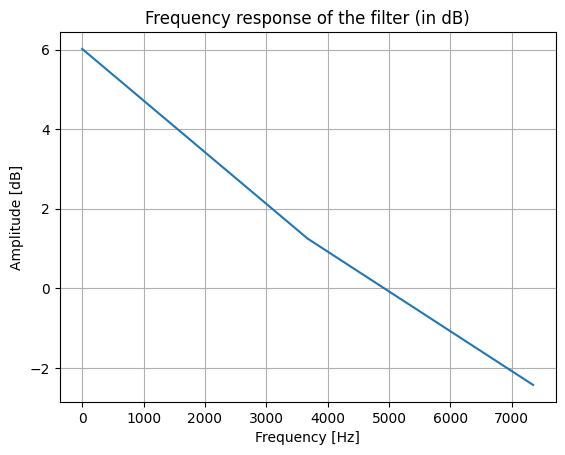

In [5]:
N = len(y)
fs = sr
T = N / fs
W, H = freqz(s_iir, 1, round(T/2), fs=fs)


# Plot the frequency response
plt.figure(1)
plt.plot(W, 20 * np.log10(np.abs(H) + np.finfo(float).eps))
plt.title('Frequency response of the filter (in dB)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(True)
plt.show()

## Implement the delay effect in the time domain

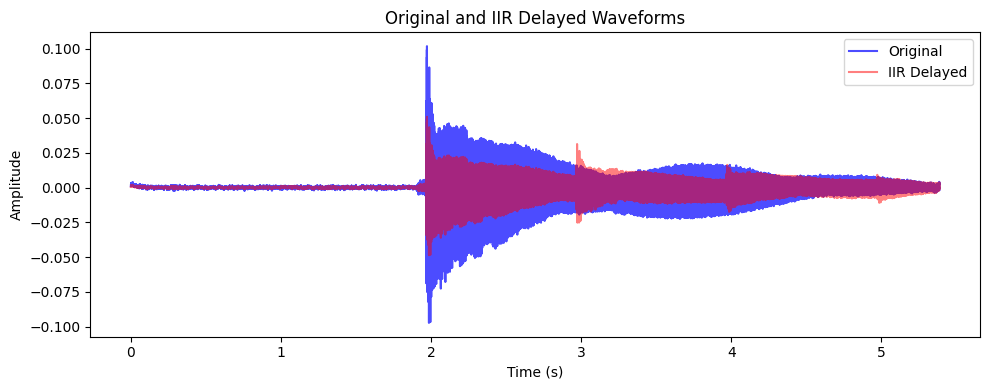

In [6]:
a = 0.5
D = sr
s_iir = np.zeros_like(y)
beta = 0.5

# Apply the IIR delay effect 
for t in range(len(y)):
    s_iir[t] = a * y[t] + beta * s_iir[t - D]

# Plot the original and IIR delayed waveforms
plt.figure(figsize=(10, 4))

# librosa.display.waveshow(y, sr=sr, alpha=0.7, label='Original')
# librosa.display.waveshow(s_iir, sr=sr, color='r', alpha=0.5, label='IIR Delayed')
plt.plot(np.linspace(0, len(y) / sr, len(y)), y, label='Original', color='b', alpha=0.7)
plt.plot(np.linspace(0, len(s_iir) / sr, len(s_iir)), s_iir, label='IIR Delayed', color='r', alpha=0.5)

plt.title('Original and IIR Delayed Waveforms')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

ipd.Audio(s_iir, rate=sr)

## Is this implementation always stable ?
If the value of `B` is between 0 and 1, the feedback component will decay over time, contributing to the stability of the filter. For instability to occur in this filter, `B` would need to be greater than 1. In that case, the feedback term would amplify over time, causing the filter's response to grow without bound.

## Discuss the parameters

- `a` (Scaling Factor): This determines the gain of the input signal. A value greater than 1 amplifies the signal, and a value between 0 and 1 attenuates it.
- `B` (Attenuation Factor): This determines the attenuation of the delayed signal. A value of 1 means no attenuation, while a value greater than 1 can lead to instability.
- `D` (Time Delay): This determines the delay in time steps

## Compare with the FIR implementation

Infinite Impulse Response (IIR) filters have feedback (recursive) elements, while Finite Impulse Response (FIR) filters do not. Some comparisons:

- `Stability`: IIR filters can become unstable, while FIR filters are always stable.
- `Phase Response`: FIR filters can have a linear phase response, which means the phase delay is constant across frequencies. This is not always the case for IIR filters. So for applications where maintaining the timing relationships between different frequencies is important, we use FIR filters.